In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
import os
from tqdm.notebook import tqdm
from ast import literal_eval
import pickle

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [3]:
with open("pkl_files/X_train.pkl", "rb") as f:
    X_train = pickle.load(f)

with open("pkl_files/X_test.pkl", "rb") as f:
    X_test = pickle.load(f)

with open("pkl_files/X_train_padded.pkl", "rb") as f:
    X_train_padded = pickle.load(f)

with open("pkl_files/y_train.pkl", "rb") as f:
    y_train = pickle.load(f)

with open("pkl_files/X_test_padded.pkl", "rb") as f:
    X_test_padded = pickle.load(f)

with open("pkl_files/y_test.pkl", "rb") as f:
    y_test = pickle.load(f)


In [4]:
# Define model parameters
max_words = 10000
embedding_dim = 128
input_length = 100
epochs = 10
batch_size = 64

In [5]:
# Function to create RNN model
def create_rnn_model(max_words, embedding_dim, input_length):
    model = Sequential()
    model.add(
        Embedding(
            input_dim=max_words, output_dim=embedding_dim, input_length=input_length
        )
    )
    model.add(SimpleRNN(units=128))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model


# Function to create LSTM model
def create_lstm_model(max_words, embedding_dim, input_length):
    model = Sequential()
    model.add(
        Embedding(
            input_dim=max_words, output_dim=embedding_dim, input_length=input_length
        )
    )
    model.add(LSTM(units=128))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model


# Function to create GRU model
def create_gru_model(max_words, embedding_dim, input_length):
    model = Sequential()
    model.add(
        Embedding(
            input_dim=max_words, output_dim=embedding_dim, input_length=input_length
        )
    )
    model.add(GRU(units=128))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model


In [6]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()


In [7]:
# Function to plot training history
def plot_history(history, model_name):
    # Plotting accuracy
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title(f"{model_name} Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title(f"{model_name} Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()


## RNN

In [8]:
# Train RNN model
rnn_model = create_rnn_model(max_words, embedding_dim, input_length)
print("Training RNN model...")
rnn_history = rnn_model.fit(
    X_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2
)
print(rnn_model.summary())


Training RNN model...
Epoch 1/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.9127 - loss: 0.2193 - val_accuracy: 0.9724 - val_loss: 0.0875
Epoch 2/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.9817 - loss: 0.0573 - val_accuracy: 0.9770 - val_loss: 0.0794
Epoch 3/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.9936 - loss: 0.0221 - val_accuracy: 0.9578 - val_loss: 0.1157
Epoch 4/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.9990 - loss: 0.0057 - val_accuracy: 0.9706 - val_loss: 0.1010
Epoch 5/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - accuracy: 0.9998 - loss: 0.0016 - val_accuracy: 0.9746 - val_loss: 0.0996
Epoch 6/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.9999 - loss: 9.9427e-04 - val_accuracy: 0.9767 - val_loss: 0.1001
Epoch 7/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.9999 - loss: 6.1194e-04 - val_accuracy: 0.9760 - val_loss: 0.1023
Epoch 8/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,939,077 (15.03 MB)

 Trainable params: 1,313,025 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,626,052 (10.02 MB)

None


In [9]:
# Evaluate RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_padded, y_test)
print(f"RNN Accuracy: {rnn_accuracy:.4f}")

245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9788 - loss: 0.0815
RNN Accuracy: 0.9788


In [10]:
y_pred_probs = rnn_model.predict(X_test_padded)

y_pred_labels = (y_pred_probs > 0.5).astype(int).flatten()

245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


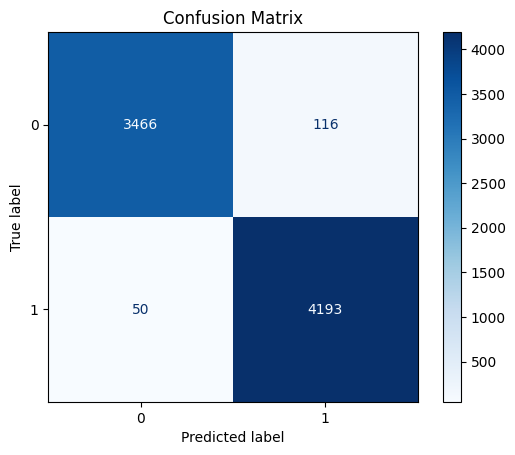

In [11]:
display_confusion_matrix(y_test, y_pred_labels)

In [12]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3582
           1       0.97      0.99      0.98      4243

    accuracy                           0.98      7825
   macro avg       0.98      0.98      0.98      7825
weighted avg       0.98      0.98      0.98      7825



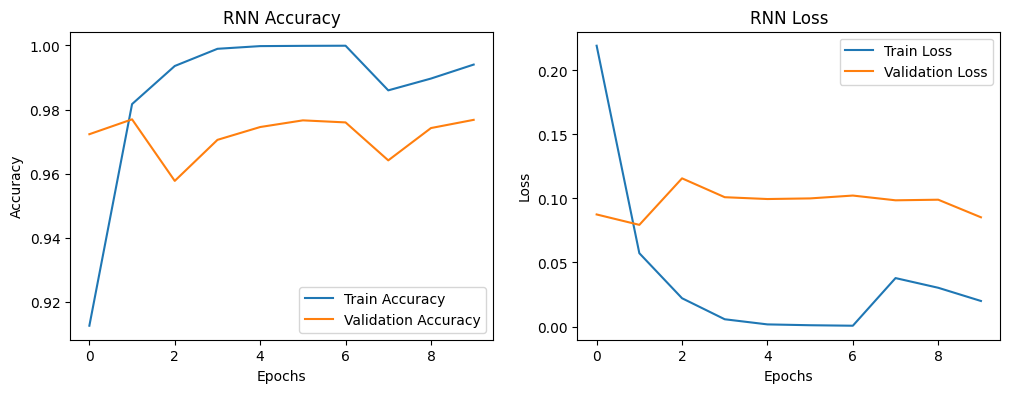

In [13]:
# Plotting the training history for each model
plot_history(rnn_history, "RNN")

## LSTM

In [14]:
# Train LSTM model
lstm_model = create_lstm_model(max_words, embedding_dim,input_length)
print("Training LSTM model...")
lstm_history = lstm_model.fit(
    X_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2
)
print(lstm_model.summary())

Training LSTM model...
Epoch 1/10


392/392 ━━━━━━━━━━━━━━━━━━━━ 77s 188ms/step - accuracy: 0.9514 - loss: 0.1423 - val_accuracy: 0.9701 - val_loss: 0.0890
Epoch 2/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 62s 138ms/step - accuracy: 0.9788 - loss: 0.0673 - val_accuracy: 0.9674 - val_loss: 0.0910
Epoch 3/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 66s 168ms/step - accuracy: 0.9902 - loss: 0.0326 - val_accuracy: 0.9834 - val_loss: 0.0605
Epoch 4/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 62s 158ms/step - accuracy: 0.9940 - loss: 0.0190 - val_accuracy: 0.9837 - val_loss: 0.0649
Epoch 5/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 52s 133ms/step - accuracy: 0.9950 - loss: 0.0164 - val_accuracy: 0.9858 - val_loss: 0.0569
Epoch 6/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 56s 143ms/step - accuracy: 0.9974 - loss: 0.0086 - val_accuracy: 0.9735 - val_loss: 0.0836
Epoch 7/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 61s 155ms/step - accuracy: 0.9957 - loss: 0.0136 - val_accuracy: 0.9832 - val_loss: 0.0568
Epoch 8/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 61s 156ms/step - accuracy: 0.9928 - loss: 0.0212 - val

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,235,141 (16.16 MB)

 Trainable params: 1,411,713 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,823,428 (10.77 MB)

None


In [15]:
# # Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_padded, y_test)
print(f"LSTM Accuracy: {lstm_accuracy:.4f}")

245/245 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.9848 - loss: 0.0505
LSTM Accuracy: 0.9848


In [16]:
y_pred_probs = lstm_model.predict(X_test_padded)
y_pred_labels = (y_pred_probs > 0.5).astype(int).flatten()

245/245 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step


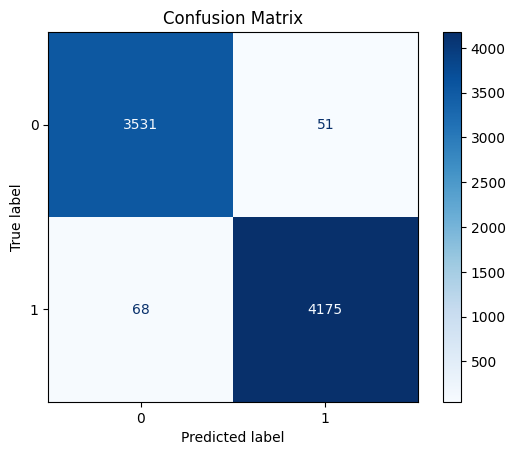

In [17]:
display_confusion_matrix(y_test, y_pred_labels)

In [18]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3582
           1       0.99      0.98      0.99      4243

    accuracy                           0.98      7825
   macro avg       0.98      0.98      0.98      7825
weighted avg       0.98      0.98      0.98      7825



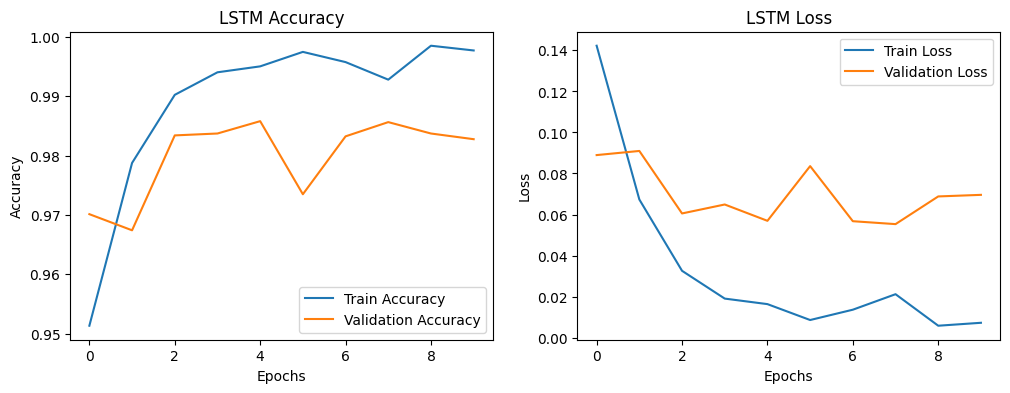

In [19]:
plot_history(lstm_history, "LSTM")


## GRU

In [20]:
# Train GRU model
gru_model = create_gru_model(max_words, embedding_dim, input_length)
print("Training GRU model...")
gru_history = gru_model.fit(
    X_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2
)
print(gru_model.summary())


Training GRU model...
Epoch 1/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 61s 152ms/step - accuracy: 0.9527 - loss: 0.1347 - val_accuracy: 0.9775 - val_loss: 0.0680
Epoch 2/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 65s 165ms/step - accuracy: 0.9879 - loss: 0.0392 - val_accuracy: 0.9821 - val_loss: 0.0542
Epoch 3/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 73s 186ms/step - accuracy: 0.9942 - loss: 0.0204 - val_accuracy: 0.9720 - val_loss: 0.0838
Epoch 4/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 53s 134ms/step - accuracy: 0.9919 - loss: 0.0283 - val_accuracy: 0.9840 - val_loss: 0.0486
Epoch 5/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 48s 122ms/step - accuracy: 0.9706 - loss: 0.0806 - val_accuracy: 0.9495 - val_loss: 0.1447
Epoch 6/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 61s 155ms/step - accuracy: 0.9857 - loss: 0.0431 - val_accuracy: 0.9872 - val_loss: 0.0413
Epoch 7/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 51s 130ms/step - accuracy: 0.9981 - loss: 0.0074 - val_accuracy: 0.9837 - val_loss: 0.0517
Epoch 8/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 48s 123ms/step - accu

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,137,605 (15.78 MB)

 Trainable params: 1,379,201 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,758,404 (10.52 MB)

None


In [21]:
# Evaluate GRU model
gru_loss, gru_accuracy = gru_model.evaluate(X_test_padded, y_test)
print(f"GRU Accuracy: {gru_accuracy:.4f}")

245/245 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9903 - loss: 0.0454
GRU Accuracy: 0.9903


In [22]:
y_pred_probs = gru_model.predict(X_test_padded)
y_pred_labels = (y_pred_probs > 0.5).astype(int).flatten()

245/245 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step


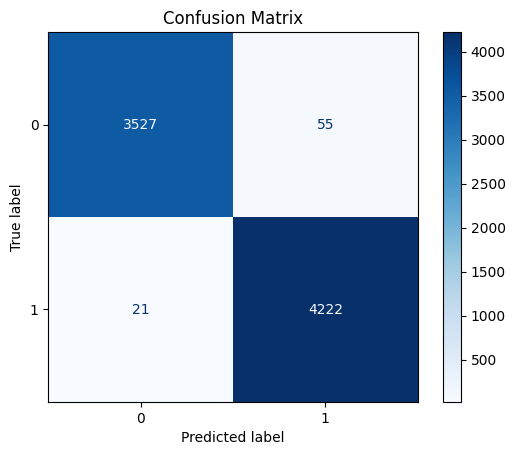

In [23]:
display_confusion_matrix(y_test, y_pred_labels)

In [24]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3582
           1       0.99      1.00      0.99      4243

    accuracy                           0.99      7825
   macro avg       0.99      0.99      0.99      7825
weighted avg       0.99      0.99      0.99      7825



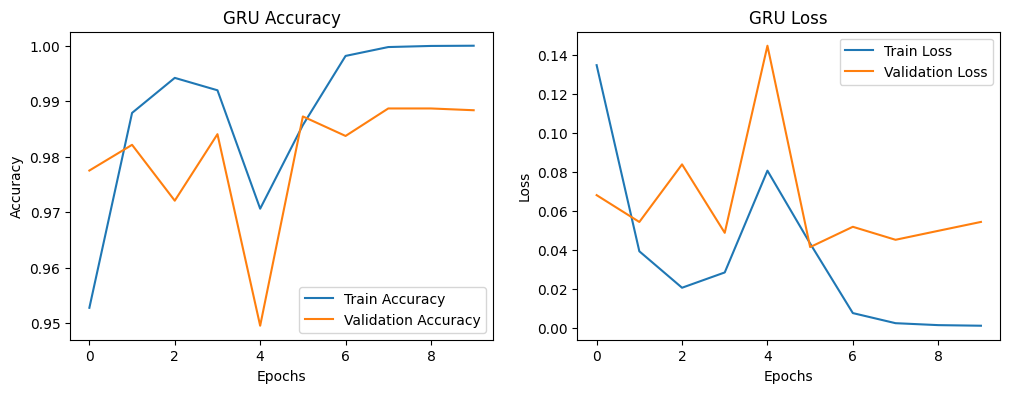

In [25]:
plot_history(gru_history, "GRU")

----------------------------------------------

In [26]:
import torch

torch.save(rnn_model, "models/rnn_model.pkl")
torch.save(lstm_model, "models/lstm_model.pkl")
torch.save(gru_model, "models/gru_model.pkl")

---------------------

# Models Using Glove

In [27]:
def load_glove(path):
    glove = {}
    with open(path, "r", encoding="utf8") as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector
    return glove

In [28]:
glove_path = "glove.6B.300d.txt"
glove = load_glove(glove_path)
glove_dim = 300

In [29]:
max_len = 256
max_words = 10000

In [30]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


In [31]:
embedding_matrix = np.zeros((max_words, glove_dim))
for word, i in tokenizer.word_index.items():
    if i < max_words and word in glove:
        embedding_matrix[i] = glove[word]


In [32]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight="balanced", classes=np.unique(y_train), y=y_train
)

## RNN

In [33]:
# Train RNN model
rnn_model_Glove = create_rnn_model(max_words, embedding_dim, input_length)
print("Training RNN model...")
rnn_history = rnn_model_Glove.fit(
    X_train_pad,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    class_weight=dict(enumerate(class_weights)),
)


print(rnn_model_Glove.summary())


Training RNN model...
Epoch 1/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - accuracy: 0.9071 - loss: 0.2210 - val_accuracy: 0.9562 - val_loss: 0.1386
Epoch 2/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.9422 - loss: 0.1516 - val_accuracy: 0.9241 - val_loss: 0.1910
Epoch 3/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.9574 - loss: 0.1230 - val_accuracy: 0.8530 - val_loss: 0.3236
Epoch 4/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 36s 93ms/step - accuracy: 0.9020 - loss: 0.2481 - val_accuracy: 0.8851 - val_loss: 0.2586
Epoch 5/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 55s 141ms/step - accuracy: 0.9294 - loss: 0.1794 - val_accuracy: 0.9115 - val_loss: 0.2234
Epoch 6/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.9532 - loss: 0.1254 - val_accuracy: 0.9094 - val_loss: 0.2232
Epoch 7/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.9710 - loss: 0.0822 - val_accuracy: 0.9275 - val_loss: 0.2038
Epoch 8/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 27s 69ms/step - accuracy: 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 256, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,939,077 (15.03 MB)

 Trainable params: 1,313,025 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,626,052 (10.02 MB)

None


In [34]:
# Evaluate RNN model
rnn_loss, rnn_accuracy = rnn_model_Glove.evaluate(X_test_pad, y_test)
print(f"RNN Accuracy: {rnn_accuracy:.4f}")

245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9397 - loss: 0.2438
RNN Accuracy: 0.9397


In [35]:
y_pred_probs = rnn_model_Glove.predict(X_test_pad)

y_pred_labels = (y_pred_probs > 0.3).astype(int).flatten()

245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


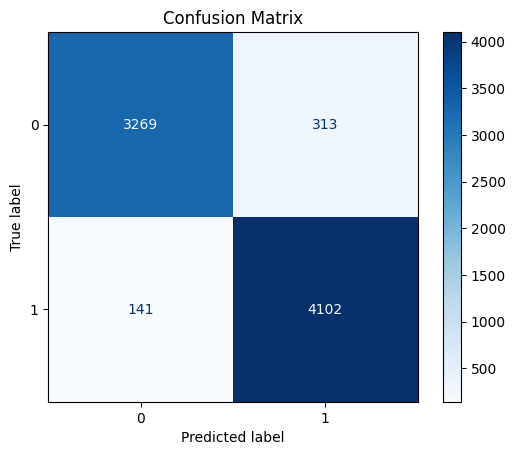

In [36]:
display_confusion_matrix(y_test, y_pred_labels)

In [37]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      3582
           1       0.93      0.97      0.95      4243

    accuracy                           0.94      7825
   macro avg       0.94      0.94      0.94      7825
weighted avg       0.94      0.94      0.94      7825



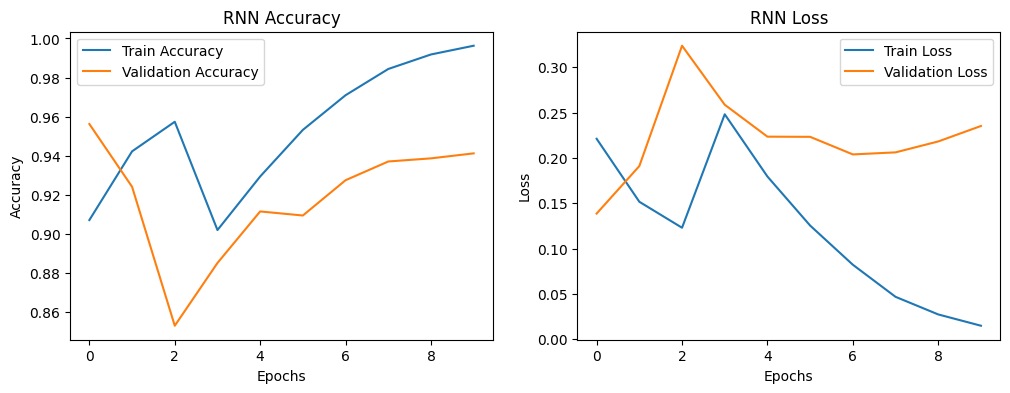

In [38]:
# Plotting the training history for each model
plot_history(rnn_history, "RNN")

## LSTM

In [39]:
# Train LSTM model
lstm_model_Glove = create_lstm_model(max_words, embedding_dim, input_length)
print("Training LSTM model...")
lstm_history = lstm_model_Glove.fit(
    X_train_pad, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2
)
print(lstm_model_Glove.summary())

Training LSTM model...
Epoch 1/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 66s 164ms/step - accuracy: 0.9483 - loss: 0.1431 - val_accuracy: 0.9586 - val_loss: 0.1173
Epoch 2/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 64s 162ms/step - accuracy: 0.9802 - loss: 0.0591 - val_accuracy: 0.9743 - val_loss: 0.0823
Epoch 3/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 63s 160ms/step - accuracy: 0.9933 - loss: 0.0218 - val_accuracy: 0.9805 - val_loss: 0.0678
Epoch 4/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 64s 162ms/step - accuracy: 0.9960 - loss: 0.0136 - val_accuracy: 0.9904 - val_loss: 0.0368
Epoch 5/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 66s 168ms/step - accuracy: 0.9929 - loss: 0.0222 - val_accuracy: 0.9893 - val_loss: 0.0433
Epoch 6/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 63s 161ms/step - accuracy: 0.9977 - loss: 0.0084 - val_accuracy: 0.9911 - val_loss: 0.0390
Epoch 7/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 62s 158ms/step - accuracy: 0.9990 - loss: 0.0040 - val_accuracy: 0.9925 - val_loss: 0.0417
Epoch 8/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 63s 160ms/step - acc

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 256, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,235,141 (16.16 MB)

 Trainable params: 1,411,713 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,823,428 (10.77 MB)

None


In [40]:
# # Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model_Glove.evaluate(X_test_pad, y_test)
print(f"LSTM Accuracy: {lstm_accuracy:.4f}")

245/245 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9885 - loss: 0.0369
LSTM Accuracy: 0.9885


In [41]:
y_pred_probs = lstm_model_Glove.predict(X_test_pad)
y_pred_labels = (y_pred_probs > 0.3).astype(int).flatten()

245/245 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step


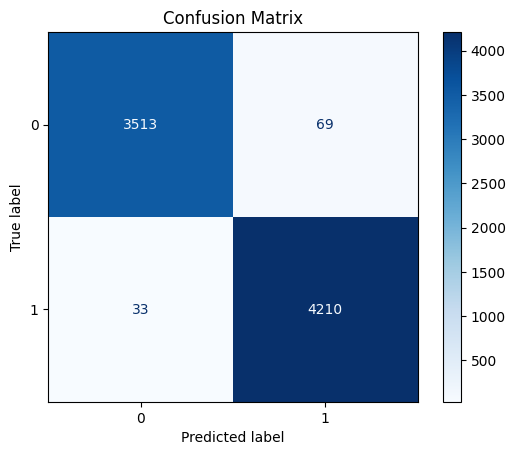

In [42]:
display_confusion_matrix(y_test, y_pred_labels)

In [43]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3582
           1       0.98      0.99      0.99      4243

    accuracy                           0.99      7825
   macro avg       0.99      0.99      0.99      7825
weighted avg       0.99      0.99      0.99      7825



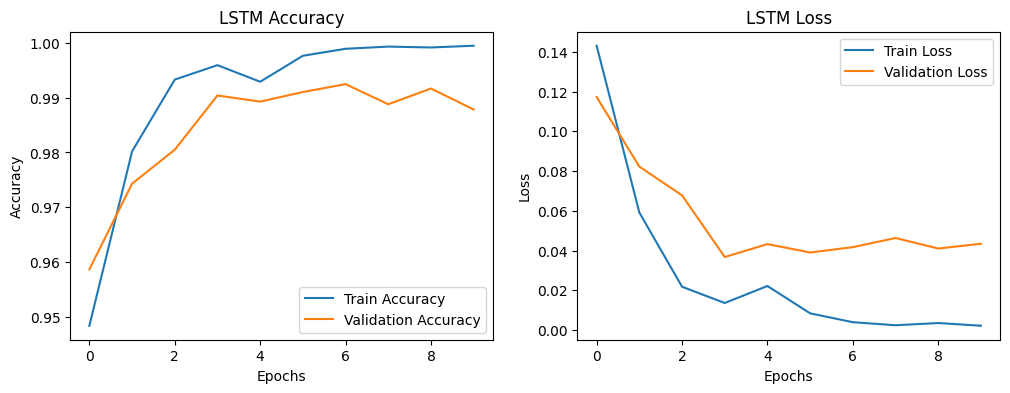

In [44]:
plot_history(lstm_history, "LSTM")


## GRU

In [45]:
# Train GRU model
gru_model_Glove = create_gru_model(max_words, embedding_dim, input_length)
print("Training GRU model...")
gru_history = gru_model_Glove.fit(
    X_train_pad, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2
)
print(gru_model_Glove.summary())


Training GRU model...
Epoch 1/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 59s 146ms/step - accuracy: 0.9554 - loss: 0.1249 - val_accuracy: 0.9869 - val_loss: 0.0454
Epoch 2/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 61s 155ms/step - accuracy: 0.9846 - loss: 0.0512 - val_accuracy: 0.9804 - val_loss: 0.0587
Epoch 3/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 60s 154ms/step - accuracy: 0.9918 - loss: 0.0261 - val_accuracy: 0.9867 - val_loss: 0.0537
Epoch 4/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 60s 154ms/step - accuracy: 0.9912 - loss: 0.0261 - val_accuracy: 0.9890 - val_loss: 0.0368
Epoch 5/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 62s 158ms/step - accuracy: 0.9966 - loss: 0.0111 - val_accuracy: 0.9877 - val_loss: 0.0444
Epoch 6/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 61s 157ms/step - accuracy: 0.9983 - loss: 0.0060 - val_accuracy: 0.9847 - val_loss: 0.0614
Epoch 7/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 61s 155ms/step - accuracy: 0.9980 - loss: 0.0079 - val_accuracy: 0.9893 - val_loss: 0.0391
Epoch 8/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 61s 156ms/step - accu

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 256, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,137,605 (15.78 MB)

 Trainable params: 1,379,201 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,758,404 (10.52 MB)

None


In [46]:
# Evaluate GRU model
gru_loss, gru_accuracy = gru_model_Glove.evaluate(X_test_pad, y_test)
print(f"GRU Accuracy: {gru_accuracy:.4f}")

245/245 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9863 - loss: 0.0599
GRU Accuracy: 0.9863


In [47]:
y_pred_probs = gru_model_Glove.predict(X_test_pad)
y_pred_labels = (y_pred_probs > 0.3).astype(int).flatten()

245/245 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step


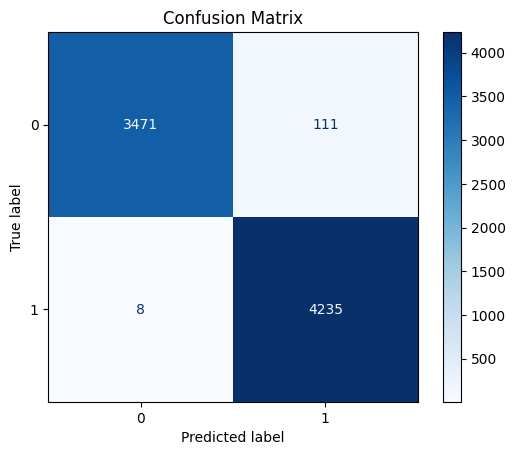

In [48]:
display_confusion_matrix(y_test, y_pred_labels)

In [49]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3582
           1       0.97      1.00      0.99      4243

    accuracy                           0.98      7825
   macro avg       0.99      0.98      0.98      7825
weighted avg       0.99      0.98      0.98      7825



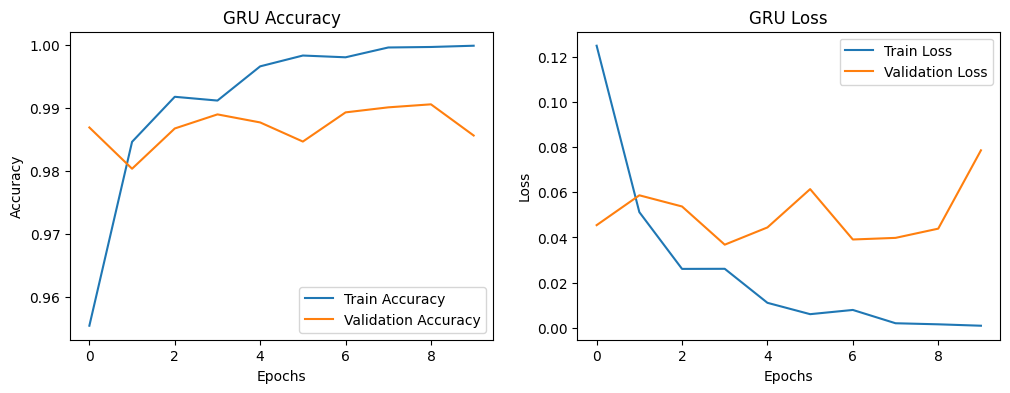

In [50]:
plot_history(gru_history, "GRU")

--------------------------------------------

In [51]:
import torch

torch.save(rnn_model_Glove, "models/rnn_model_Glove.pkl")
torch.save(lstm_model_Glove, "models/lstm_model_Glove.pkl")
torch.save(gru_model_Glove, "models/gru_model_Glove.pkl")


-------------------------------